In [1]:
import os
import json

import pandas as pd
import numpy as np

In [2]:
# faster_rcnn_1024_adam의 inference 결과를 정답으로 pseudo label로 이용  
submission_dir = '/opt/ml/level2_project/submission/'
file_name = 'cascade_rcnn_lr_00005_epoch100.csv'
file_dir = os.path.join(submission_dir, file_name)
pseudo = pd.read_csv(file_dir)
pseudo

,PredictionString,image_id
0,0 0.47128326 499.14587 597.7394 548.3113 639.5...,test/0000.jpg
1,4 0.9824112 337.21033 236.95361 758.94006 692....,test/0001.jpg
2,0 0.99391526 877.58307 460.38898 1018.58 622.9...,test/0002.jpg
3,9 0.99978286 162.23499 261.20837 896.0698 813....,test/0003.jpg
4,0 0.9719947 451.23795 413.19702 650.5996 550.6...,test/0004.jpg
...,...,...
4866,0 0.8114983 295.35806 349.97885 669.0602 693.1...,test/4866.jpg
4867,0 0.7728919 624.9093 671.60626 770.1919 722.53...,test/4867.jpg
4868,7 0.99966955 122.90115 470.8136 769.3816 859.3...,test/4868.jpg
4869,0 0.95881325 951.9647 502.86377 1022.40405 582...,test/4869.jpg


In [3]:
# level2_object-detection/baseline/mmdetection/utils/pseudo_labeling.ipynb
data_dir = '../dataset'
test_json = json.load(open(os.path.join(data_dir,'test.json')))
test_json.keys()

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

In [4]:
len(pseudo)

4871

### test json에 annotation 추가하기 

In [5]:
# confidence 0.6 이상을 정답이라고 판단 
thr = 0.6

box_id= 23144

for i in range(len(pseudo)):

    if type(pseudo['PredictionString'][i])==str:  
        
        test_json['images'][i]['file_name'] = f'train/{str(i+4883).zfill(4)}.jpg'
        test_json['images'][i]['id'] = i + 4883
        
        for j in range(len(pseudo['PredictionString'][i].split(' '))//6):
            o = pseudo['PredictionString'][i].split(' ')
            id, score, xmin, ymin, xmax, ymax = map(float,o[6*j: 6*(j+1)])
            if score<thr:
                continue
            id, xmin, ymin, xmax, ymax = map(int, [id, xmin, ymin, xmax, ymax])
            w = xmax - xmin
            h = ymax - ymin

            info = dict()
            info['image_id'] = i + 4883
            info['category_id'] = id
            info['area'] = w*h
            info['bbox'] = [xmin, ymin, w, h]
            info['iscrowd'] = 0 # 겹친 박스가 있는지 여부
            info['id'] = box_id # 박스 id
            box_id += 1
            test_json['annotations'].append(info) 
        

In [6]:
len(test_json['images'])

4871

In [7]:
len(test_json['annotations'])

19165

In [8]:
test_json['images']

[{'width': 1024,
  'height': 1024,
  'file_name': 'train/4883.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-01-01 13:30:03',
  'id': 4883},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/4884.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2020-12-27 17:23:39',
  'id': 4884},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/4885.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-04-30 11:01:01',
  'id': 4885},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/4886.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-03-28 23:38:43',
  'id': 4886},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/4887.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-01-08 00:41:15',
  'id': 4887},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/4888.jpg',
  'license': 0,
 

In [9]:
test_json['annotations']

[{'image_id': 4883,
  'category_id': 1,
  'area': 43498,
  'bbox': [559, 114, 182, 239],
  'iscrowd': 0,
  'id': 23144},
 {'image_id': 4883,
  'category_id': 5,
  'area': 3696,
  'bbox': [244, 684, 56, 66],
  'iscrowd': 0,
  'id': 23145},
 {'image_id': 4883,
  'category_id': 5,
  'area': 4015,
  'bbox': [394, 617, 55, 73],
  'iscrowd': 0,
  'id': 23146},
 {'image_id': 4883,
  'category_id': 5,
  'area': 4920,
  'bbox': [337, 640, 60, 82],
  'iscrowd': 0,
  'id': 23147},
 {'image_id': 4883,
  'category_id': 6,
  'area': 27202,
  'bbox': [430, 467, 134, 203],
  'iscrowd': 0,
  'id': 23148},
 {'image_id': 4883,
  'category_id': 7,
  'area': 106281,
  'bbox': [213, 43, 241, 441],
  'iscrowd': 0,
  'id': 23149},
 {'image_id': 4883,
  'category_id': 7,
  'area': 64272,
  'bbox': [122, 415, 208, 309],
  'iscrowd': 0,
  'id': 23150},
 {'image_id': 4883,
  'category_id': 7,
  'area': 171704,
  'bbox': [608, 516, 338, 508],
  'iscrowd': 0,
  'id': 23151},
 {'image_id': 4883,
  'category_id': 7,


### train json 불러오기 

In [10]:
data_dir = '../dataset'
train_json = json.load(open(os.path.join(data_dir,'train.json')))
train_json.keys()

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

In [11]:
len(train_json['images'])

4883

In [12]:
len(train_json['annotations'])

23144

### train json에 test json 정보 추가하기 

In [13]:
train_json['images'] += test_json['images']
train_json['annotations'] += test_json['annotations']

In [14]:
len(train_json['images'])

9754

In [15]:
len(train_json['annotations'])

42309

In [16]:
      
with open(os.path.join('./', f"pseudo_total_{file_name.split('.')[0]}.json"),'w') as f:
        json.dump(train_json, f, indent=4)

### 새로 만들어진 annotation 파일(.json)을 가지고 시각화 하기 

In [17]:
from pycocotools.coco import COCO  
coco = COCO('./pseudo_total_cascade_rcnn_lr_00005_epoch100.json')
coco

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [18]:
image_ids = coco.getImgIds()
len(image_ids)

9751

In [19]:
image_info = coco.loadImgs(image_ids) 
image_info[4883]  # test data 

{'width': 1024,
 'height': 1024,
 'file_name': 'train/4883.jpg',
 'license': 0,
 'flickr_url': None,
 'coco_url': None,
 'date_captured': '2021-01-01 13:30:03',
 'id': 4883}

In [20]:
image_info[4882]  # train data

{'width': 1024,
 'height': 1024,
 'file_name': 'train/4882.jpg',
 'license': 0,
 'flickr_url': None,
 'coco_url': None,
 'date_captured': '2020-12-23 16:20:30',
 'id': 4882}

4883.jpg


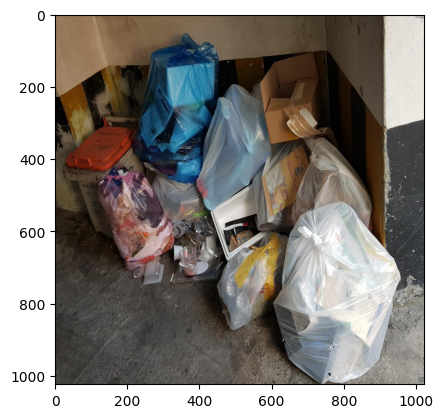

In [21]:
import os 
import cv2 
import matplotlib.pyplot as plt 

data_root = '../pseudo_dataset/'
file_name = image_info[4883]['file_name'].split('/')[1]
print(file_name)
image_path = os.path.join(data_root, 'train/' + file_name)

image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR)
plt.imshow(image)

In [22]:
from showbox import get_ann_box
import matplotlib.pyplot as plt 

/opt/conda/envs/detection/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


loading annotations into memory...
Done (t=0.35s)
creating index...
index created!


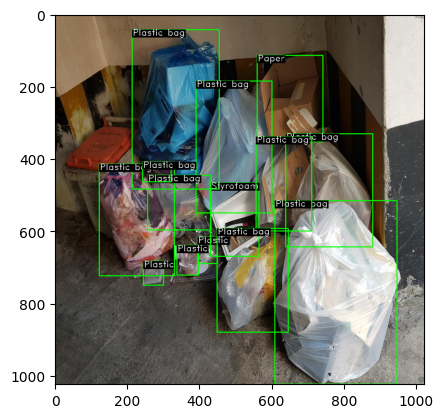

In [23]:
# 첫번째 pseudo labeling 
image_id = 4883 
coco_obj = COCO('/opt/ml/level2_project/utils/pseudo_total_cascade_rcnn_lr_00005_epoch100.json') 
root = '/opt/ml/level2_project/pseudo_dataset'
mode = 'train'

boxed_image = get_ann_box(image_id, coco_obj, root, mode)
plt.imshow(boxed_image)

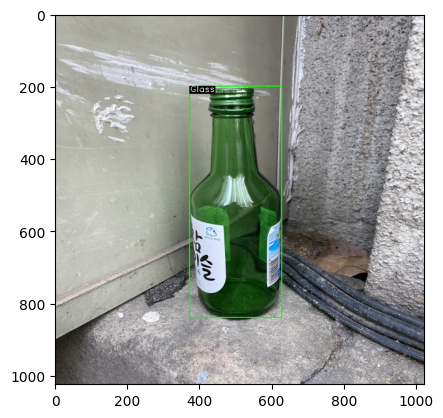

In [24]:
# 마지막 pseudo labeling
image_id = 9753
boxed_image = get_ann_box(image_id, coco_obj, root, mode)
plt.imshow(boxed_image)

### 새로 만들어진 pseudo labeling에 stratify group kfold 적용하기  

- 만들어진 json 파일을 psuedo dataset 폴더로 옮긴다 
- split_dataset.py 를 실행 시킨다  
    - 이때 json 파일 경로와 dataset 폴더 경로를 수정해 준 후 실행  